# Yelp Data Challenge - NLP

BitTiger DS501

Jun 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

/Users/iris/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/Users/iris/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/iris/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/iris/anaconda2/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/Users/iris/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

/Users/iris/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,0,0W4lkclzZThpx3V65bVgig,NaN,NaN,NaN,0.0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,1,AEx2SYEUJmTxVVB18LlCwA,NaN,NaN,NaN,0.0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,2,VR6GpWIda3SfvPC-lg9H3w,NaN,NaN,NaN,0.0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,3,CKC0-MOWMqoeWf6s-szl8g,NaN,NaN,NaN,0.0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,4,ACFtxLv8pGrrxMm6EgjreA,NaN,NaN,NaN,0.0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048292 entries, 0 to 3048291
Data columns (total 13 columns):
Unnamed: 0     object
business_id    object
name           object
categories     float64
avg_stars      float64
cool           float64
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(6), object(7)
memory usage: 302.3+ MB


### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text']

In [6]:
documents = df['text'].replace('\n','', regex=True).tolist()
documents = [str(i) for i in documents]
documents = [' '.join(item.split()) for item in documents]

In [7]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
type(documents), len(documents)

(list, 3048292)

In [8]:
documents[0]

"Love the staff, love the meat, love the place. Prepare for a long line around lunch or dinner hours. They ask you how you want you meat, lean or something maybe, I can't remember. Just say you don't want it too fatty. Get a half sour pickle and a hot pepper. Hand cut french fries too."

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [9]:
# Make a column and take the values, save to a variable named "target"
df['target']= np.where(df['stars']==5,'perfect','imperfect')
target = df['target'].values

#### You may want to look at the statistic of the target variable

In [10]:
target.shape, type(target)

((3048292,), numpy.ndarray)

In [11]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Vendor:  continuum
Product: anaconda
Message: trial mode expires in 30 days
Solving environment: done

# All requested packages already installed.



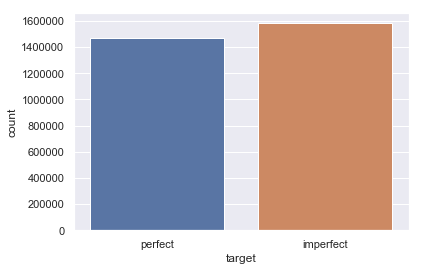

In [12]:
# To be implemented
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df)
plt.show()

## Let's create training dataset and test dataset

In [13]:
from sklearn.cross_validation import train_test_split

/Users/iris/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Documents is your X, target is your y
# Now split the data to training set and test set
X = documents
y = target

In [15]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(X, y, test_size=0.4)

In [16]:
print len(documents_train), target_train.shape
print len(documents_test), target_test.shape

1828975 (1828975,)
1219317 (1219317,)


## Let's get NLP representation of the documents

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from string import punctuation

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
vectors = vectorizer.fit_transform(documents_train).toarray()
words = vectorizer.get_feature_names()

In [19]:
vectors.shape

(1828975, 500)

In [20]:
vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16500355, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06378698, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
words

[u'00',
 u'10',
 u'12',
 u'15',
 u'20',
 u'30',
 u'50',
 u'able',
 u'absolutely',
 u'actually',
 u'add',
 u'ago',
 u'amazing',
 u'appetizer',
 u'appointment',
 u'area',
 u'arrived',
 u'ask',
 u'asked',
 u'ate',
 u'atmosphere',
 u'attentive',
 u'authentic',
 u'available',
 u'average',
 u'away',
 u'awesome',
 u'bacon',
 u'bad',
 u'bar',
 u'bbq',
 u'beautiful',
 u'beef',
 u'beer',
 u'believe',
 u'best',
 u'better',
 u'big',
 u'birthday',
 u'bit',
 u'bite',
 u'bought',
 u'bowl',
 u'bread',
 u'breakfast',
 u'bring',
 u'brought',
 u'brunch',
 u'buffet',
 u'burger',
 u'burgers',
 u'business',
 u'busy',
 u'buy',
 u'cake',
 u'called',
 u'came',
 u'car',
 u'card',
 u'care',
 u'change',
 u'charge',
 u'cheap',
 u'check',
 u'cheese',
 u'chicken',
 u'chinese',
 u'chips',
 u'chocolate',
 u'choice',
 u'choose',
 u'clean',
 u'close',
 u'coffee',
 u'cold',
 u'come',
 u'comes',
 u'comfortable',
 u'coming',
 u'company',
 u'completely',
 u'cooked',
 u'cool',
 u'cost',
 u'couldn',
 u'counter',
 u'couple',
 

In [ ]:
X = vectors
y = target_train

In [ ]:
y_test = target_test
X_test = vectorizer.transform(documents_test)

## Similar review search engine

In [ ]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

#def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    #return [labels[i] for i in np.argsort(lst)[::-1][:n]]

In [ ]:
avg = np.sum(vectors, axis=0) / np.sum(vectors > 0, axis=0)
print("top 10 by average tf-idf")
print(get_top_values(avg, 10, words))

In [ ]:
total = np.sum(vectors, axis=0)
print("top 10 by total tf-idf")
print(get_top_values(total, 10, words))

In [ ]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Draw an arbitrary review from test (unseen in training) documents
y_test = target_test

In [ ]:
# Transform the drawn review(s) to vector(s)
X_test = vectorizer.transform(documents_test)

In [ ]:
# Calculate the similarity score(s) between vector(s) and training vectors
print(cosine_similarity(vectors[0].reshape(1, -1), vectors[1].reshape(1, -1)))

In [ ]:
# Let's find top 5 similar reviews
n = 5
avg = np.sum(vectors, axis=0) / np.sum(vectors > 0, axis=0)
print("top 5 by average tf-idf")
print(get_top_values(avg, n, words))

In [ ]:
print('Our search query:')
print() # To be added

In [ ]:
print('Most %s similar reviews:' % n)
print()  # To be added

#### Q: Does the result make sense to you?

A: (insert your comments here)

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [ ]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X, y)

In [ ]:
# Get score for training set
model.score(X, y)

In [ ]:
# Get score for test set
model.score(X_test, y_test)

#### Logistic Regression Classifier

In [ ]:
# Build a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X, y)

In [ ]:
# Get score for training set
model.score(X, y)

In [ ]:
# Get score for test set
model.score(X_test, y_test)

#### Q: What are the key features(words) that make the positive prediction?

In [ ]:
# Let's find it out by ranking
n = 20
pass

A: (insert your comments here)

#### Q: What are the key features(words) that make the negative prediction?

In [ ]:
# Let's find it out by ranking
n = 20
pass

A: (insert your comments here)

#### Random Forest Classifier

In [ ]:
# Build a Random Forest Classifier
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=200,max_depth=50,min_samples_leaf=3, random_state=1)
model = OneVsRestClassifier(estimator,n_jobs=-1)

model.fit(X, y)

In [ ]:
# Get score for training set
model.score(X, y)

In [ ]:
# Get score for test set
model.score(X_test, y_test)

#### Q: What do you see from the training score and the test score?

A: (insert your comments here)

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [ ]:
n = 20
pass

## Extra Credit #1: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
# To be implemented
pass

## Extra Credit #2: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
# To be implemented
pass